In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def OU(T,dt, tau, sigma):
    N = int(T/dt)
    x = np.zeros(N)
    for t in range(N-1):
        x[t+1] = x[t] -x[t]/tau*dt + sigma*np.random.normal()*np.sqrt(dt)
    return x

In [3]:
T = 500
dt = 0.002
### I'm running two Ornstein Uhlenbeck processes to simulate two EEG signals (working as if I have two channels)
x1 = OU(T,dt,4,3)
x2 = OU(T,dt,4,3)
x3 = OU(T,dt,4,3)
x4 = OU(T,dt,4,3)
x5 = OU(T,dt,4,3)
x6 = OU(T,dt,4,3)
x7 = OU(T,dt,4,3)
x8 = OU(T,dt,4,3)


channels = np.array([x1,x2,x3,x4,x5,x6,x7,x8])
channels.shape

(8, 250000)

In [4]:
t = np.arange(0,T,dt)

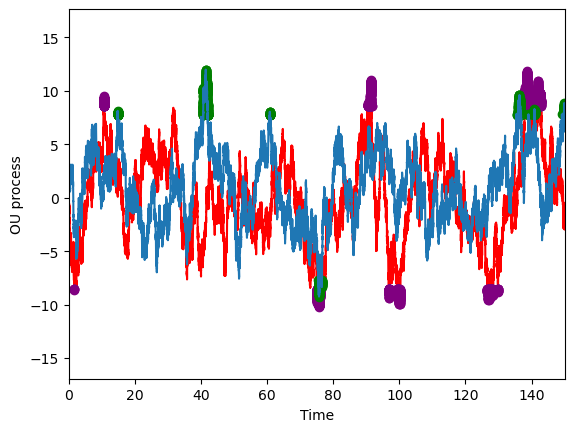

In [5]:
plt.plot(t,x1, 'r')
thr = 2
plt.plot(t[np.abs(x1) > np.std(x1)*thr],x1[np.abs(x1) > np.std(x1)*thr], 'o', color ='purple')
plt.plot(t[np.abs(x2) > np.std(x2)*thr],x2[np.abs(x2) > np.std(x2)*thr], 'go')

plt.plot(t,x2);
plt.xlabel('Time')
plt.ylabel('OU process');
plt.xlim(0,150);

In [6]:
#av_indice.shape

In [7]:
thr

2

In [6]:
#final_t.max()
for i in channels:
    print(i)
    print(i.shape)

[ 0.          0.25695819  0.34362796 ... -0.70504414 -0.68651867
 -0.67965998]
(250000,)
[ 0.         -0.02287657  0.3240558  ... -4.54495161 -4.55872619
 -4.63618423]
(250000,)
[ 0.         -0.0802798  -0.19532646 ...  1.70459422  1.82110914
  1.54068994]
(250000,)
[ 0.         -0.19045237 -0.46187689 ... -2.40212346 -2.55550587
 -2.30490973]
(250000,)
[0.         0.26424372 0.28169889 ... 2.35575076 2.21522982 2.18845841]
(250000,)
[ 0.          0.16568072  0.19948677 ... -3.43651607 -3.33583751
 -3.44709566]
(250000,)
[ 0.00000000e+00 -7.25171093e-05 -2.31985089e-03 ...  1.92027319e+00
  1.94569237e+00  1.92434392e+00]
(250000,)
[0.         0.39634064 0.41856586 ... 2.11125573 2.15267457 2.18593804]
(250000,)


In [11]:


final_t = np.zeros(channels[0].shape)
#o = 0
for i in channels:
    final_t += np.array(np.abs(i)> np.std(i)*thr, dtype = float)
    #o+= 1
#print(o)
final_t = np.array(final_t, dtype = bool)
final_t = np.array(final_t, dtype = float)

final_t.shape, channels.shape

((250000,), (8, 250000))

In [23]:
av_indice_start = np.where((final_t[1:] - final_t[:-1]) >0)[0]### these are the indices where an avalanche begins
av_indice_end = np.where((final_t[1:] - final_t[:-1])< 0)[0]### these are the indices where an avalanche ends

In [24]:
from matplotlib import cm
colors = cm.Reds(np.linspace(0.2,1,8))

In [25]:
len(av_indice_start), len(av_indice_end)

(1876, 1876)

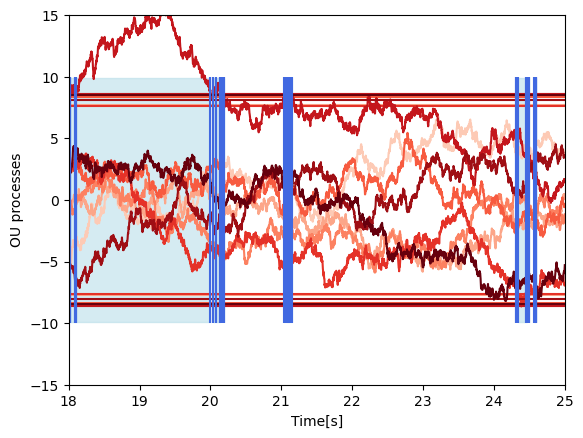

In [22]:
for g in range(len(channels)):
    plt.plot(t,channels[g],color = colors[g])
    plt.hlines(np.std(channels[g])*thr, 0,T,color = colors[g])
    plt.hlines(-np.std(channels[g])*thr, 0,T,color = colors[g])
    
    
for jj in range(len(av_indice_start)):
    #plt.fill_between(np.arange(t[av_indice_start[jj]],t[av_indice_end[jj]] + 0.002,0.002),-10,10, color = 'lightblue', alpha = .5)
    plt.axvspan(t[av_indice_start[jj]],t[av_indice_end[jj]],0.17,1-0.17, color = 'lightblue', alpha = .5)

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[av_indice_start],-10,10, color = 'royalblue')
plt.vlines(t[av_indice_end],-10,10, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('OU processes');
plt.xlim(18,25);
plt.ylim(-15,15);

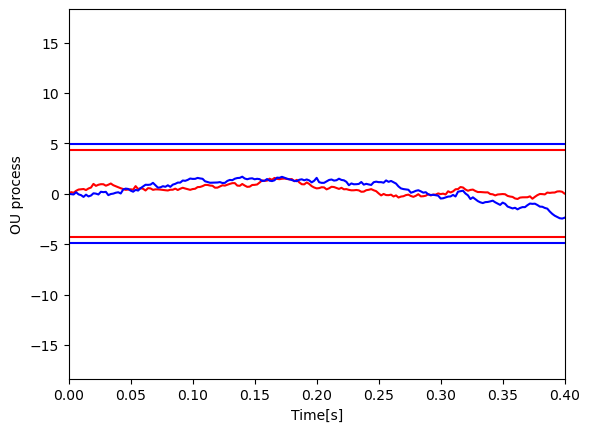

In [74]:
plt.plot(t,(x1), 'r')
plt.plot(t,x2,'b')


plt.vlines(t[av_indice_start],-10,10, color = 'green')
plt.vlines(t[av_indice_end],-10,10, color = 'red')

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha =   0.3)


plt.hlines(np.std(x1), 0,T,'r')
plt.hlines(-np.std(x1), 0,T,'r')

plt.hlines(np.std(x2), 0,T,'b')
plt.hlines(-np.std(x2), 0,T,'b')

plt.xlabel('Time[s]')
plt.ylabel('OU process');
plt.xlim(0,0.4);

In [15]:
if len(av_indice_start) < len(av_indice_end):
    av_indice_start = np.insert(av_indice_start,0,0)
    
    
if len(av_indice_start) > len(av_indice_end):
    #print(av_indice_end)
    av_indice_end = np.append(av_indice_end,len(x1))

In [21]:
av_indice_end[-1],len(x1)

(247913, 250000)

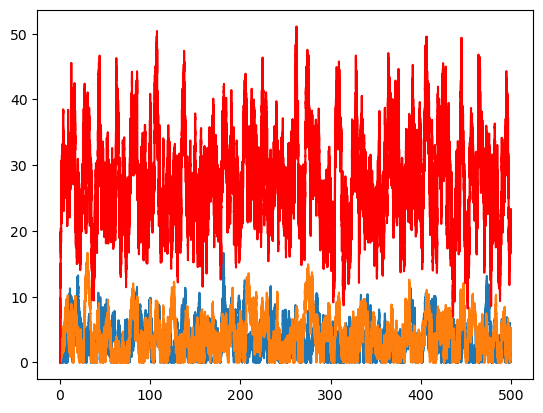

In [78]:
global_signal = np.zeros(channels[0].shape)
for i in channels:
    global_signal+= np.abs(i)
    
plt.plot(t,np.abs(x1) )
plt.plot(t,np.abs(x2) )
plt.plot(t,global_signal,'r' )

In [16]:
#valanche_dur = []

for s in range(len(av_indice_start)):
    if len(av_indice_start) != len(av_indice_end):
        print('Error, they must be of the same length')

In [17]:
global_signal = np.zeros(channels[0].shape)
for i in channels:
    global_signal+= np.abs(i)
    

avalanche_sizes = []
avalanche_dur = []

for s in range(len(av_indice_start)):
    if len(av_indice_start) != len(av_indice_end):
        print('Error, they must be of the same length')
        break
    avalanche_sizes.append(np.sum(global_signal[av_indice_start[s]:av_indice_end[s]]))
    avalanche_dur.append(t[av_indice_end[s]-1]- t[av_indice_start[s]])
    

In [18]:
len(avalanche_sizes), len(avalanche_dur)

(1876, 1876)

In [4]:
1000*20/0.001

20000000.0

In [6]:
1/500

0.002

In [10]:
1000*8/0.001

8000000.0